In [9]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# fix the random seed for consistency
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# the inputs are normalized from 0-255 to 0.0–1.0 and converted from int to float.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Transpose the input data's dimensions.
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# A final assessment of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 dropout_7 (Dropout)         (None, 3, 32, 32)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 16, 32)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                      

In [11]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# fix the random seed for consistency
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# the inputs are normalized from 0-255 to 0.0–1.0 and converted from int to float.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Transpose the input data's dimensions.
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# A final assessment of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 dropout_9 (Dropout)         (None, 3, 32, 32)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 32, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 16, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 16, 64)         18496     
                                                                 
 dropout_10 (Dropout)        (None, 1, 16, 64)         0         
                                                      

In [12]:
predictions = model.predict(X_test[:4])
print(predictions)
print(np.argmax(predictions, axis=1))
print(y_test[:4])


1/1 [==============================] - 0s 182ms/step
[[6.6421755e-02 4.8251629e-02 4.9000204e-02 3.7323502e-01 8.7610923e-02
  2.3808683e-01 3.8983859e-02 2.4645276e-02 4.1188173e-02 3.2576293e-02]
 [4.0154178e-02 9.1406219e-02 1.3929103e-03 1.1444984e-03 9.6673996e-04
  1.9689640e-03 5.0818251e-04 1.2016086e-03 8.4895992e-01 1.2296793e-02]
 [5.3523266e-01 3.0359907e-02 3.6236208e-02 1.0163108e-02 1.4053379e-02
  1.1074324e-02 5.2310782e-04 6.3204574e-03 3.2090539e-01 3.5131443e-02]
 [7.7109390e-01 1.6146995e-02 1.9118270e-02 1.4980440e-02 4.4592754e-03
  5.2235037e-04 4.0119587e-04 1.6665384e-01 2.7205385e-03 3.9031005e-03]]
[3 8 0 0]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


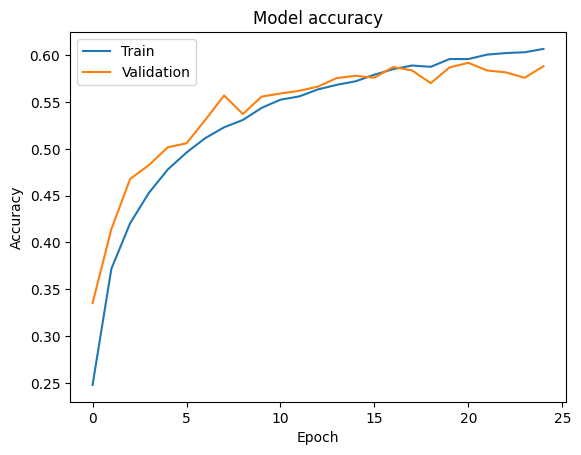

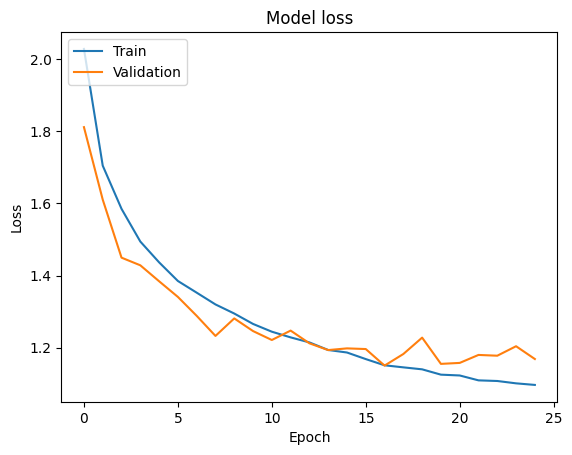

In [13]:
import matplotlib.pyplot as plt

# Plot the accuracy values for training & validation.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Visualize the training and validation loss values.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()